In [11]:
import os
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image
from sklearn import tree
from graphviz import Source
from sklearn.tree import export_graphviz

In [2]:
df= pd.read_csv("cosmetic.csv")
print(df)

             Age  Income  Gender Marital Status Buys
0     lessthan21    High    Male         Single   No
1     lessthan21    High    Male        Married   No
2         21to35    High    Male         Single  Yes
3   graterthan35  Medium    Male         Single  Yes
4   graterthan35     Low  Female         Single  Yes
5   graterthan35     Low  Female        Married   No
6         21to35     Low  Female        Married  Yes
7     lessthan21  Medium    Male         Single   No
8     lessthan21     Low  Female        Married  Yes
9   graterthan35  Medium  Female         Single  Yes
10    lessthan21  Medium  Female        Married  Yes
11        21to35  Medium    Male        Married  Yes
12        21to35    High  Female         Single  Yes
13  graterthan35  Medium    Male        Married   No


In [3]:
y= df["Buys"]
df= df.drop(columns="Buys")
print(df)

             Age  Income  Gender Marital Status
0     lessthan21    High    Male         Single
1     lessthan21    High    Male        Married
2         21to35    High    Male         Single
3   graterthan35  Medium    Male         Single
4   graterthan35     Low  Female         Single
5   graterthan35     Low  Female        Married
6         21to35     Low  Female        Married
7     lessthan21  Medium    Male         Single
8     lessthan21     Low  Female        Married
9   graterthan35  Medium  Female         Single
10    lessthan21  Medium  Female        Married
11        21to35  Medium    Male        Married
12        21to35    High  Female         Single
13  graterthan35  Medium    Male        Married


In [4]:
le= LabelEncoder()
df["Marital Status"]= le.fit_transform(df["Marital Status"])
df["Age"]= le.fit_transform(df["Age"])
df["Income"]= le.fit_transform(df["Income"])
df["Gender"]= le.fit_transform(df["Gender"])
print(df)

    Age  Income  Gender  Marital Status
0     2       0       1               1
1     2       0       1               0
2     0       0       1               1
3     1       2       1               1
4     1       1       0               1
5     1       1       0               0
6     0       1       0               0
7     2       2       1               1
8     2       1       0               0
9     1       2       0               1
10    2       2       0               0
11    0       2       1               0
12    0       0       0               1
13    1       2       1               0


In [5]:
classifier= DecisionTreeClassifier(criterion='entropy',max_depth=4)
classifier.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
tree.export_graphviz(classifier,out_file="tree.dot",feature_names=["Age","Income","Gender","Maritial_status"])

In [7]:
from subprocess import call

In [8]:
call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

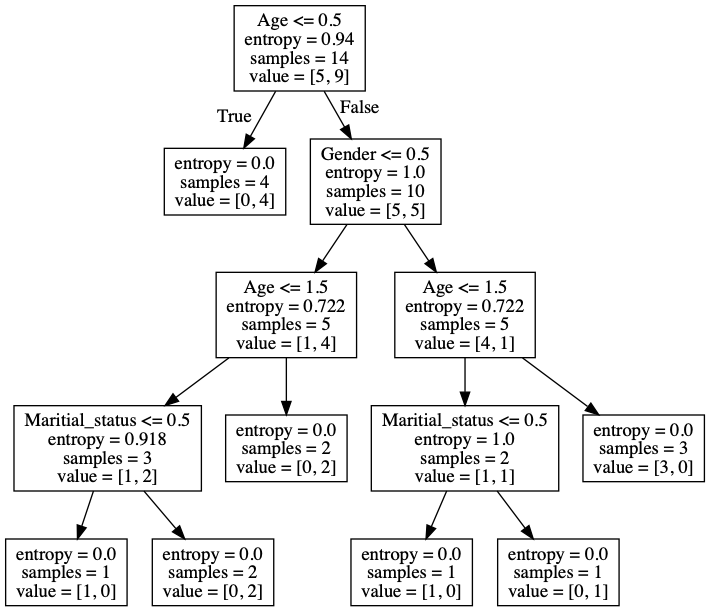

In [9]:
Image(filename='tree.png')

In [13]:
test=np.array([(2,1,0,1)])
classifier.predict(test)

array(['Yes'], dtype=object)